In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set(rc={"figure.dpi":100, 'savefig.dpi':100})
sns.set_context('notebook')

In [3]:
# File paths
IN_POS_FILE = '../feature_data/input_positions.csv'
IN_POS_FILE_TEST = '../feature_data/input_positions_test.csv'

# Keys to the pickle objects
CITY = 'city'
LANE = 'lane'
LANE_NORM = 'lane_norm'
SCENE_IDX = 'scene_idx'
AGENT_ID = 'agent_id'
P_IN = 'p_in'
V_IN = 'v_in'
P_OUT = 'p_out'
V_OUT = 'v_out'
CAR_MASK = 'car_mask'
TRACK_ID = 'track_id'

# Column headers in the CSV files
WAS_TARGET = 'was_target'
P_IN_X = ['p_in_x' + str(i) for i in range(1, 20)]
P_IN_Y = ['p_in_y' + str(i) for i in range(1, 20)]

In [4]:
def describe(a, desc):
    print(f"{desc}")
    print(f"min = {np.min(a)}")
    print(f"max = {np.max(a)}")
    print(f"mean = {np.mean(a)}")
    print(f"median = {np.median(a)}")
    print(f"standard deviation = {np.std(a)}\n")

In [5]:
def plot_hist(x, y, bins, title, palette, xlbl, ylbl, fname):
    """
    Plots a histogram of the two arrays x and y.
    """
    fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
    sns.set_palette(palette)
    sns.histplot(ax=ax1, x=x, y=y, bins=bins, cbar=True)
    ax1.set_xlabel(xlbl)
    ax1.set_ylabel(ylbl);
    ax1.set_title(title);
    plt.savefig(fname)

# Distribution of input positions (training data)

In [6]:
df = pd.read_csv(IN_POS_FILE)

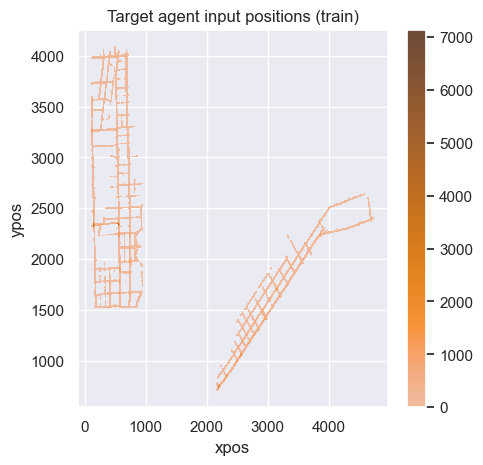

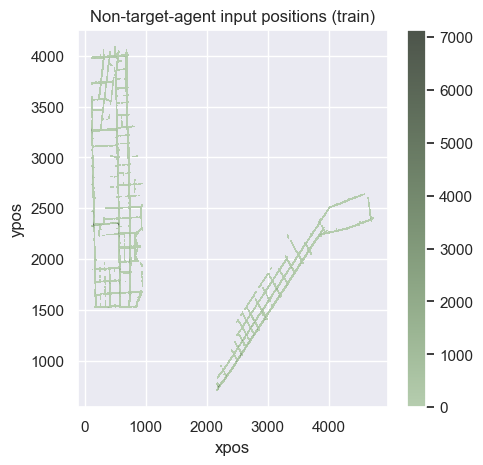

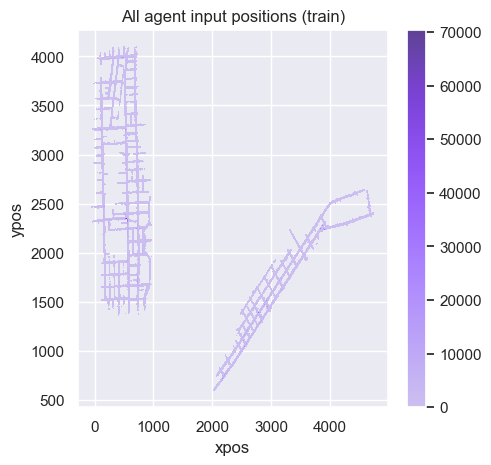

In [9]:
# Get all of the input x and y positions for target agents
xpos_t = df[df[WAS_TARGET] == 1][P_IN_X].to_numpy()
xpos_t = xpos_t.reshape(xpos_t.shape[0] * xpos_t.shape[1])

ypos_t = df[df[WAS_TARGET] == 1][P_IN_Y].to_numpy()
ypos_t = ypos_t.reshape(ypos_t.shape[0] * ypos_t.shape[1])

# Get all of the input x and y positions for non-target agents
xpos_n = df[df[WAS_TARGET] == 0][P_IN_X].to_numpy()
xpos_n = xpos_n.reshape(xpos_n.shape[0] * xpos_n.shape[1])

ypos_n = df[df[WAS_TARGET] == 0][P_IN_Y].to_numpy()
ypos_n = ypos_n.reshape(ypos_n.shape[0] * ypos_n.shape[1])

# Get all of the input x and y positions for all agents
xpos = df[P_IN_X].to_numpy()
xpos = xpos.reshape(xpos.shape[0] * xpos.shape[1])

ypos = df[P_IN_Y].to_numpy()
ypos = ypos.reshape(ypos.shape[0] * ypos.shape[1])

# Plot the positions
title = 'Target agent input positions (train)'
palette = 'Reds'
bins = 1000
x_label, y_label = 'xpos', 'ypos'
fname = '../milestone_images/inPosTargTrain'
plot_hist(xpos_t, ypos_t, bins, title, palette, x_label, y_label, fname)

title = 'Non-target-agent input positions (train)'
palette = 'Greens'
fname = '../milestone_images/inPosNonTrain'
plot_hist(xpos_t, ypos_t, bins, title, palette, x_label, y_label, fname)

title = 'All agent input positions (train)'
palette = 'plasma'
fname = '../milestone_images/inPosTrain'
plot_hist(xpos, ypos, bins, title, palette, x_label, y_label, fname)

# Distribution of input positions (test)

In [10]:
df = pd.read_csv(IN_POS_FILE_TEST)

In [11]:
# Get all of the input x and y positions for target agents
xpos_t = df[df[WAS_TARGET] == 1][P_IN_X].to_numpy()
xpos_t = xpos_t.reshape(xpos_t.shape[0] * xpos_t.shape[1])

ypos_t = df[df[WAS_TARGET] == 1][P_IN_Y].to_numpy()
ypos_t = ypos_t.reshape(ypos_t.shape[0] * ypos_t.shape[1])

# Get all of the input x and y positions for non-target agents
xpos_n = df[df[WAS_TARGET] == 0][P_IN_X].to_numpy()
xpos_n = xpos_n.reshape(xpos_n.shape[0] * xpos_n.shape[1])

ypos_n = df[df[WAS_TARGET] == 0][P_IN_Y].to_numpy()
ypos_n = ypos_n.reshape(ypos_n.shape[0] * ypos_n.shape[1])

# Get all of the input x and y positions for all agents
xpos = df[P_IN_X].to_numpy()
xpos = xpos.reshape(xpos.shape[0] * xpos.shape[1])

ypos = df[P_IN_Y].to_numpy()
ypos = ypos.reshape(ypos.shape[0] * ypos.shape[1])

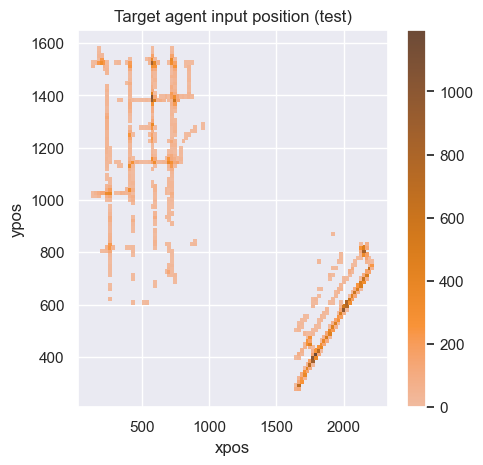

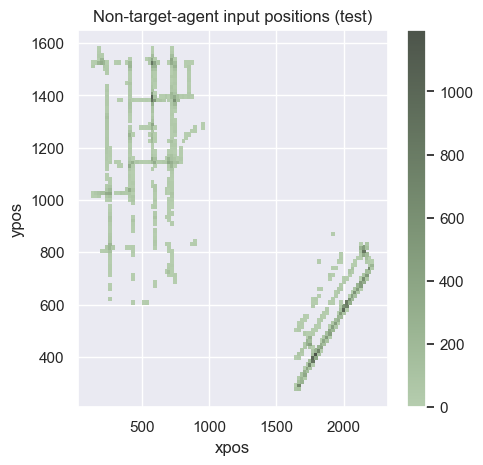

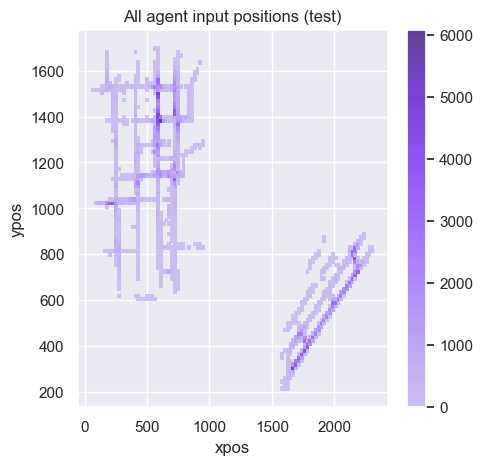

In [13]:
title = 'Target agent input position (test)'
palette = 'Reds'
bins = 100
x_label, ylabel = 'xpos', 'ypos'
fname = '../milestone_images/inPosTargTest'
plot_hist(xpos_t, ypos_t, bins, title, palette, x_label, y_label, fname)

title = 'Non-target-agent input positions (test)'
palette = 'Greens'
fname = '../milestone_images/inPosNonTest'
plot_hist(xpos_t, ypos_t, bins, title, palette, x_label, y_label, fname)

title = 'All agent input positions (test)'
palette = 'plasma'
fname = '../milestone_images/inPosTest'
plot_hist(xpos, ypos, bins, title, palette, x_label, y_label, fname)